In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
def LA2(data, p, eps=1e-6):
    Xi = 3 * (p + 1)
    X = data[np.arange(p) + np.arange(len(data) - p)[:, None]]
    omega = np.argpartition(np.sum(np.power(X - data[-p:], 2), axis=1), Xi)[:Xi]
    idx = np.arange(p)[:, None] - np.arange(p) <= 0
    Y = np.hstack((np.ones(Xi)[:, None], (X[omega, :, None] * X[omega, None, :])[:, idx]))
    params = np.linalg.solve(Y.T.dot(Y) + eps * np.eye(Y.shape[1]), Y.T.dot(data[omega + p]))
    return params, np.sum(params * np.hstack([1, (data[-p:, None] * data[-p:])[idx]]))


In [37]:
data = pd.read_csv('SPY.csv')
date = data['Date'].values
price_open = data['Open'].values
price_close = data['Close'].values
X = price_open - price_close

predict [ 1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1.  1.  1.  1. -1. -1.
 -1.  1. -1. -1.  1. -1.  1. -1.  1. -1. -1.  1.]


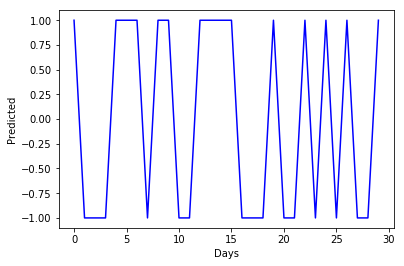

In [38]:
ans = np.array([])
p = 2
for i in range(30):
    pred = LA2(X, p)[1]
    ans = np.append(ans, pred)
    X = np.append(X, pred)
ans[ans > 0] = 1
ans[ans < 0] = -1

print('predict', ans)
plt.plot(np.arange(len(ans)), ans, 'b')
plt.xlabel('Days')
plt.ylabel('Predicted')
plt.show()